In [3]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random
from numpy import *  
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
uploaded = files.upload()

Saving abalone.csv to abalone (1).csv


In [6]:
df = pd.read_csv(list(uploaded.keys())[0])
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.columns = ['Sex',
'Length',
'Diameter',
'Height',
'Whole weight',
'Shucked weight',
'Viscera weight',
'Shell weight',
'Rings']
df




,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


[1527, 1342, 1307]


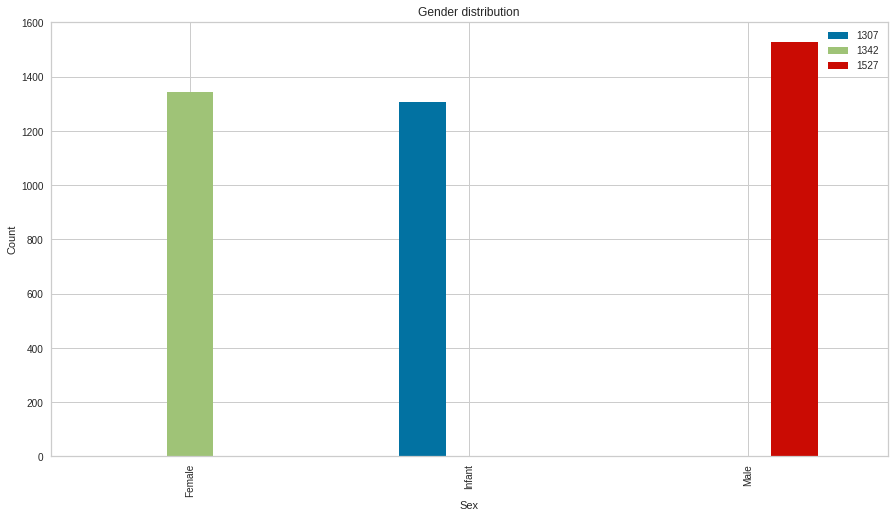

In [157]:
sex = list(df.Sex.value_counts())
print(sex)
df_new  = pd.DataFrame()
df_new['Sex'] = ['Male', 'Female', 'Infant']
df_new['Count'] = sex
df_new.pivot(index='Sex', columns='Count' , values= 'Count').plot(kind='bar',
                                                                  figsize=(15,8))

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title ( 'Gender distribution')
plt.legend(loc='upper right')
plt.show()






In [8]:
## data cleaning
def int_conversion(sex):
  if sex == 'M':
    return 0
  elif sex == 'F':
    return 1
  else:
    return -1

df['Sex'] = df.Sex.apply(lambda x:int_conversion(x))
df = df.sort_values(["Rings"], ascending = (True))


In [7]:
## class distribution
df['Diameter'].value_counts()

0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.650      1
0.625      1
0.090      1
0.610      1
0.620      1
Name: Diameter, Length: 111, dtype: int64

In [240]:
##checking for null values
df.isnull().values.any()

False

<Figure size 576x396 with 0 Axes>

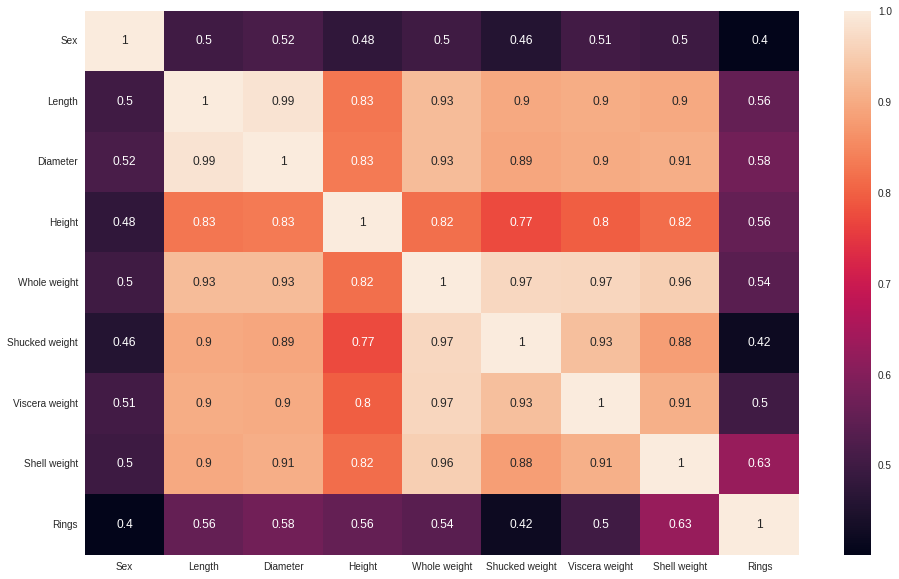

<Figure size 576x396 with 0 Axes>

In [9]:
## coeff matrix
pd.options.display.float_format = '{:,.3f}'.format
df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.figure()


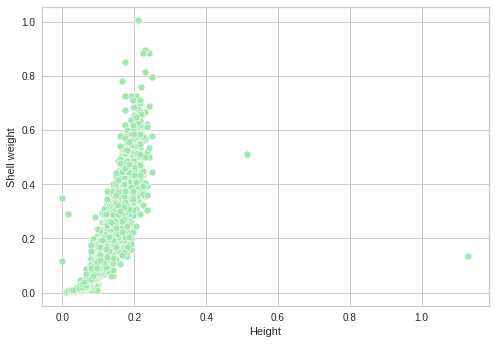

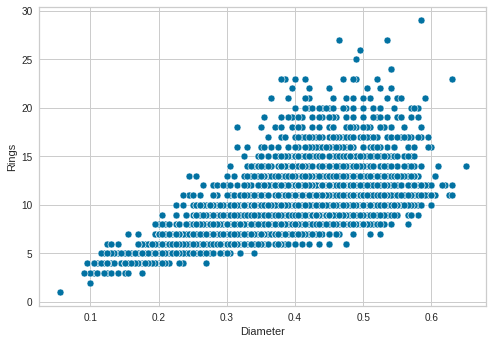

In [23]:
##scatter plots
sns.scatterplot(data = df, x = "Height", y = "Shell weight", color='#A0E8AF')
plt.show()


sns.scatterplot(data = df, x = "Diameter", y = "Rings")
plt.show()

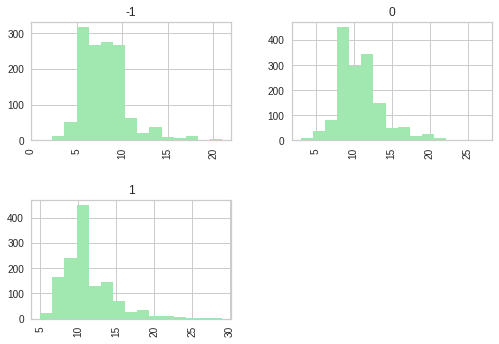

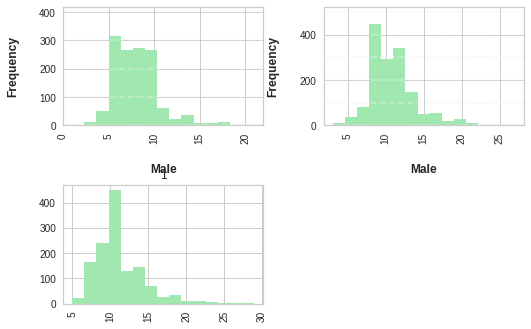

In [278]:
## visulaisations

df.hist(column='Rings', by='Sex',color='#A0E8AF', bins=15)

ax = df.hist(column='Rings', by='Sex',color='#A0E8AF', bins=15)
ax = ax[0]
for x in ax:


    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel('Male', labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

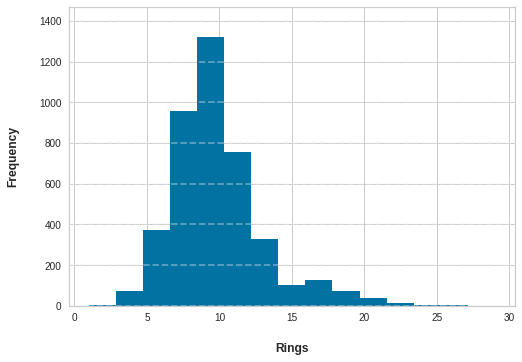

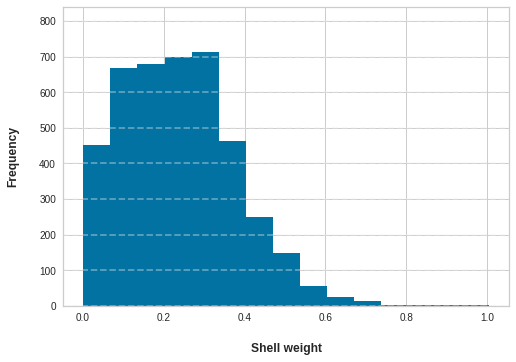

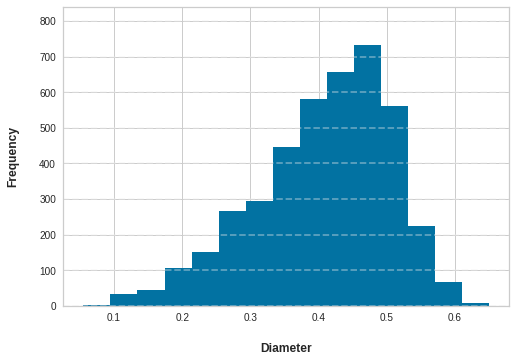

In [207]:
#histograms for the selected features
feature = ['Rings', 'Shell weight', 'Diameter']
for items in feature:
  ax = df.hist(column=items, bins=15)
  ax = ax[0]
  for x in ax:


      # Draw horizontal axis lines
      vals = x.get_yticks()
      for tick in vals:
          x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      # Remove title
      x.set_title("")

      # Set x-axis label
      x.set_xlabel(items, labelpad=20, weight='bold', size=12)

      # Set y-axis label
      x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


In [18]:
## linear modal

def get_data(normalise, i): 

    data_inputx = df.iloc[:,:8] # all features 
    #data_inputx = df[['Diameter', 'Shell weight']] # two features   


    if normalise == True:
        transformer = Normalizer().fit(data_inputx)  # fit does nothing.
        data_inputx = transformer.transform(data_inputx)
 
    

    data_inputy =df.iloc[:, 8] # this is target - so that last col is selected from data

    percent_test = 0.4
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=i)

    return x_train, x_test, y_train, y_test
     
def scikit_linear_mod(x_train, x_test, y_train, y_test): 
    regr = linear_model.LinearRegression()
    visualizer = PredictionError(regr)
    visualizer.fit(x_train, y_train)  
    visualizer.score(x_test, y_test)  
    visualizer.poof()

    visualizer = ResidualsPlot(regr, hist=False)
    visualizer.fit(x_train, y_train)  
    visualizer.score(x_test, y_test)  
    visualizer.poof()
 

     # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    rsquared = r2_score(y_test, y_pred) 
 
    '''residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1)
 
    plt.savefig('scikit_linear.png')'''

    return rmse, rsquared, regr.coef_

 
def main(): 

    normalise = True
 
    
    max_exp = 1

    rmse_list = np.zeros(max_exp)
    rsq_list = np.zeros(max_exp)

    for i in range(0,max_exp):
        
        x_train, x_test, y_train, y_test = get_data(normalise, i )
        rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
        
        rmse_list[i] = rmse
        rsq_list[i] = rsquared 
        

    print(rmse_list)
    # Explained variance score: 1 is perfect prediction 
    print(rsq_list)
    
    mean_rmse = np.mean(rmse_list)
    std_rmse = np.std(rmse_list)

    mean_rsq = np.mean(rsq_list)
    std_rsq = np.std(rsq_list)

    print(mean_rmse, std_rmse, ' mean_rmse std_rmse')

    print(mean_rsq, std_rsq, ' mean_rsq std_rsq')

if __name__ == '__main__':
     main()

[2.20785175 2.14568942 2.13839596 2.18690744 2.23922881 2.08617569
 2.25113914 2.22563911 2.20649248 2.14893352 2.10105527 2.14514994
 2.26501735 2.14340127 2.15690265 2.15195578 2.17760823 2.23534277
 2.25822535 2.24350173 2.16472671 2.26755789 2.23538759 2.12512274
 2.17456534 2.17309685 2.17302608 2.27590487 2.1594905  2.12378368]
[0.55823995 0.54902174 0.55600982 0.54294523 0.55164226 0.57324438
 0.55488616 0.52036098 0.53762466 0.56090738 0.57562899 0.55420938
 0.5358058  0.54413774 0.5419797  0.55998262 0.53541662 0.53411248
 0.52331451 0.54366466 0.55014117 0.51927323 0.53174133 0.56769755
 0.54320959 0.55209834 0.54367038 0.54778233 0.55226152 0.55853301]
2.186242529291401 0.05200065426377367  mean_rmse std_rmse
0.5473181174419602 0.013798928830967097  mean_rsq std_rsq
